# Introduction

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. ([wikipedia](https://en.wikipedia.org/wiki/Loan))

### **The major aim of this notebook is to predict which of the customers will have their loan approved.**



# Data Id 📋

This dataset is named [Loan Prediction Dataset](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset) data set. The dataset contains a set of **613** records under **13 attributes**:

<img src="scottfive.gif" alt="Simple explanation" />

## The main objective for this dataset:
Using machine learning techniques to predict loan payments.

### target value: `Loan_Status`

# Libraries 📕📗📘

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("LoanData.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Two types of data
- Numerical
- Categorical

In [11]:
# we fill the null values of the categorical data, with it's mode value!

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [12]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# we fill the numerical data, with it's median!

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
data.shape

(607, 13)

# Outliers Detection & Handling

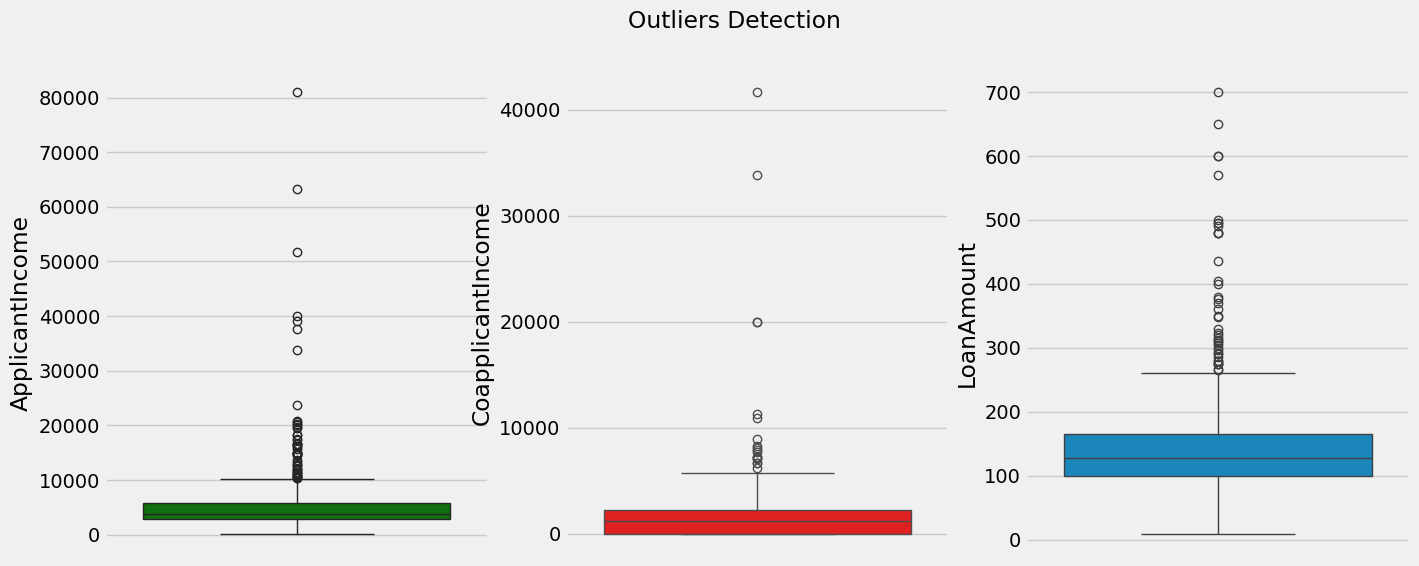

In [19]:
# We plot 3 sub-plots to detect outliers in the incomes and loan amounts.


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)    # 1 row, 3 graphs, First plot
sns.boxplot(data['ApplicantIncome'], color='g')

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'], color='r')

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [24]:
print("Before removing the outliers: ", data.shape)

data = data[data['ApplicantIncome']<25000]

print("After Removing the outliers: ", data.shape)

Before removing the outliers:  (607, 13)
After Removing the outliers:  (607, 13)


In [25]:
print("Before Removing the outliers", data.shape)

data = data[data['CoapplicantIncome']<12000]

print("After Removing the outliers", data.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [26]:
print("Before Removing the outliers", data.shape)

data = data[data['LoanAmount']<400]

print("After Removing the outliers", data.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


### Analysis 



<Axes: xlabel='LoanAmount', ylabel='Density'>

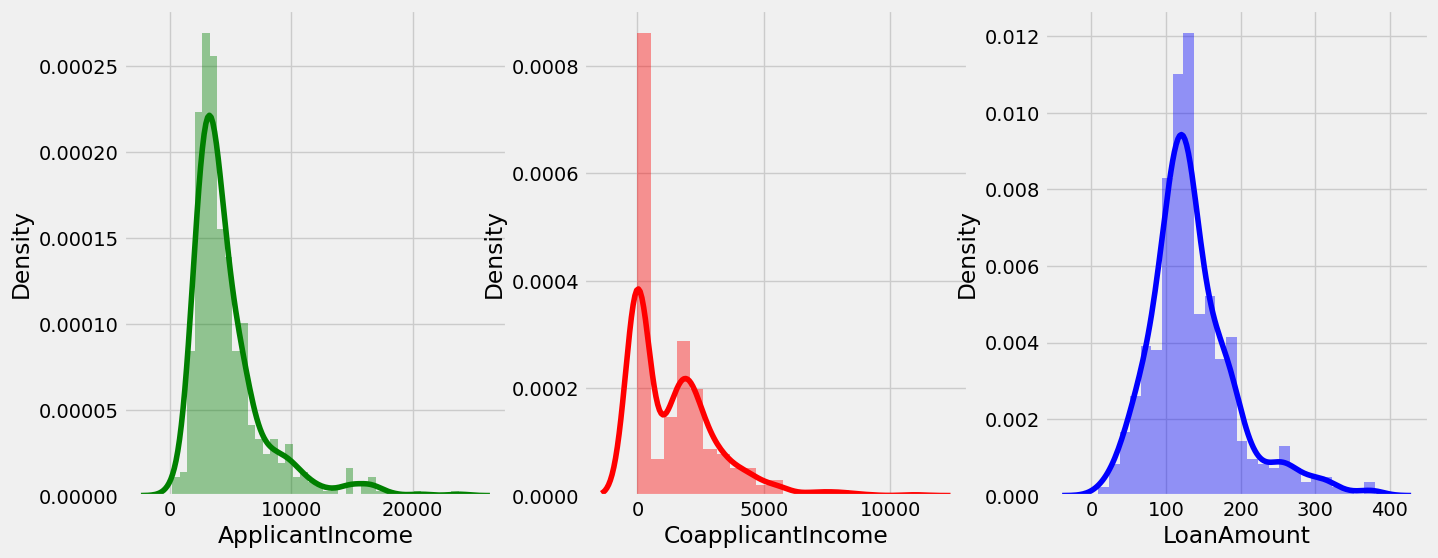

In [31]:
# we draw sub-plots to identify distribution of values.

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'r')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'blue')

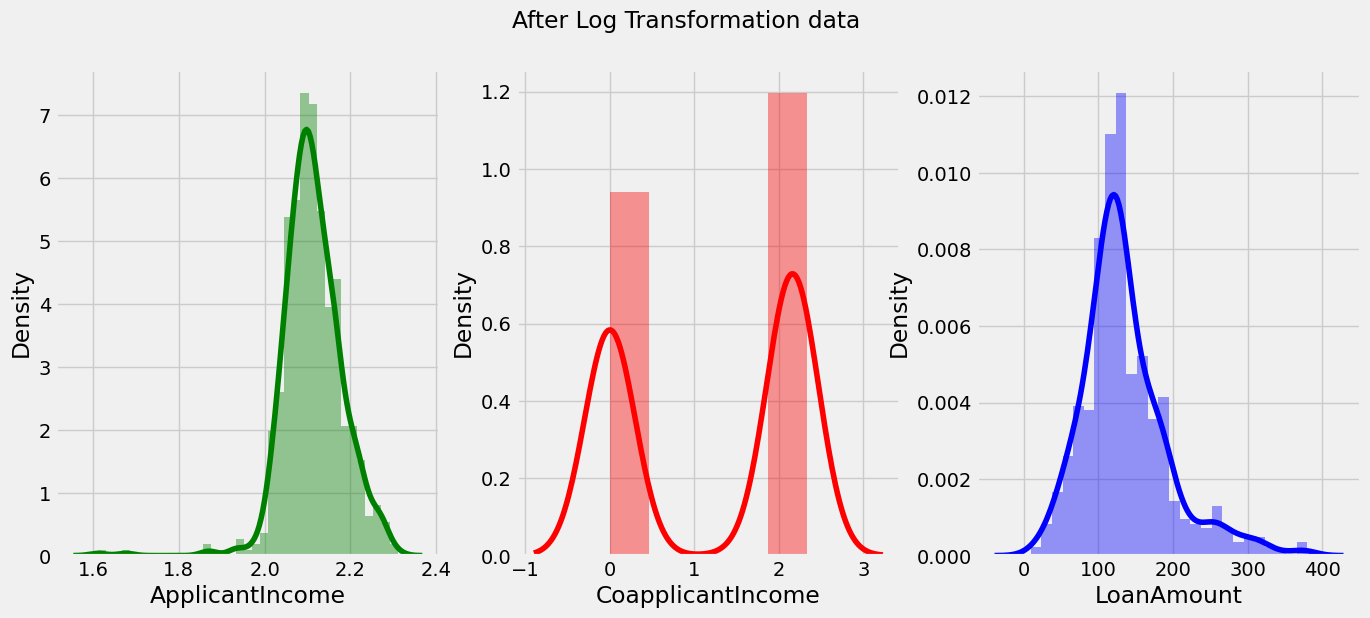

In [33]:
# for the above distribution of values, we now transform the data using log method.

data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'r')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'blue')



plt.suptitle("After Log Transformation data")
plt.show()


In [34]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

## Seperating Categorical and Numerical columns

In [19]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [35]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

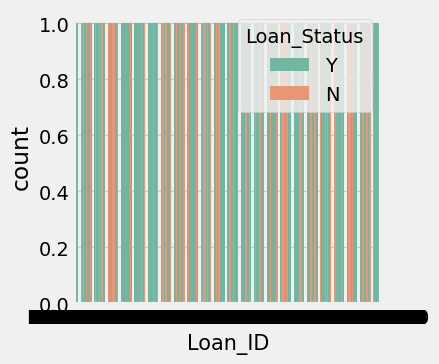

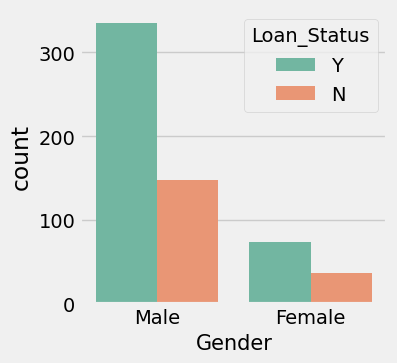

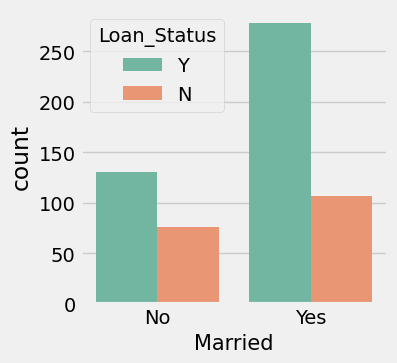

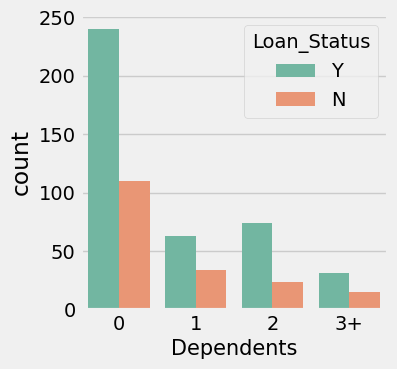

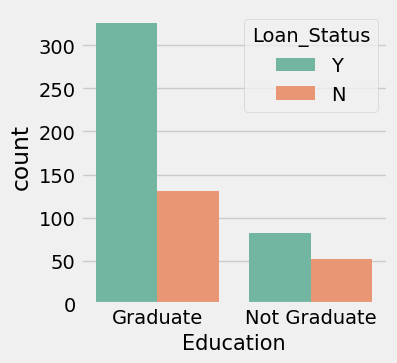

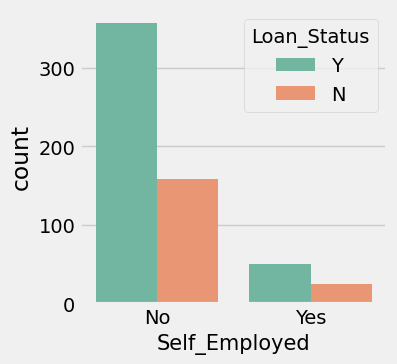

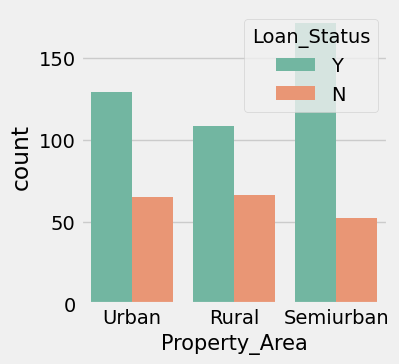

In [39]:
# We check the count of every categorical column wrt loan_status. We plot different countplots to check the values.

for i in cat[:-1]:
    plt.figure(figsize = (12,8))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data = data, palette = 'Set2' )
    plt.xlabel(i, fontsize = 15)

In [22]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Comparing Categorical Data, one by one,  with Target Data

In [45]:
#Comparing loan status with married column


print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [42]:
#Comparing loan status with education column

print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [46]:
#Comparing loan status with property area column

print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [47]:
#Comparing loan status with self employed column

print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


## DATA PREPARATION

In [51]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [ ]:
# We drop the loan id column because it does not necessarily help us with the outcome.

data = data.drop(['Loan_ID'], axis = 1)

In [54]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [56]:
#Replacing all the categorical values by 1 or 0, where 1 mostly represents Yes and 0 represents No.


data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))

data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))

data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [57]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))

data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))

data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))

data['Dependents'] = data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))


In [58]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,2.160333,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,2.131810,2.118566,128.0,360.0,1.0,0,0
2,1,1,0,1,1,2.080237,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2.061368,2.170880,120.0,360.0,1.0,1,1
4,1,0,0,1,0,2.163267,0.000000,141.0,360.0,1.0,1,1


In [59]:
# Now, we will divide the data into 2 parts based on process and outcomes!

x = data.drop(['Loan_Status'], axis = 1)
y = data['Loan_Status']

In [60]:
x.shape

(591, 11)

In [61]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [62]:
y.shape

(591,)

In [66]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

## Handle Imbalance data

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [70]:
x_resample, y_resample = SMOTE().fit_resample(x, y.values.ravel())

In [71]:
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [73]:
y.shape

(591,)

# Train test Split

In [74]:
from sklearn.model_selection import train_test_split

In [109]:
# We will divide the x and y data into training and test data for further analysis. 80% training data and 20% test data

x_train, x_test, y_train,y_test = train_test_split(x_resample, y_resample , test_size = 0.2, random_state = 0)

In [110]:
x_train.shape

(652, 11)

In [111]:
y_test.shape

(164,)

# Model Building

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.metrics import accuracy_score

In [112]:
# We will build a model using Logistic Regression, and fit the training data into the model, for further processing.

Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train, y_train)

LogisticRegression()

In [113]:
#On the basis of x test data, we will predict the outcome of y.

y_prediction = Logistic_Regression.predict(x_test)

In [114]:
# Training and test accuracy will be determined using the '.score' method, of both the training and test data

print("Training Accuracy: ", Logistic_Regression.score(x_train, y_train))
print("Test Accuracy: ", Logistic_Regression.score(x_test, y_test))

Training Accuracy:  0.7653374233128835
Test Accuracy:  0.823170731707317


In [85]:
from sklearn.metrics import classification_report

In [115]:
# We will build a classification report, on the basis of which we'll find out about the accuracy, precison, f1-score and
# support of the y test data, and also the y prediction data.

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        82
           1       0.78      0.89      0.83        82

    accuracy                           0.82       164
   macro avg       0.83      0.82      0.82       164
weighted avg       0.83      0.82      0.82       164



In [116]:
# we will check the final accuracy score of model!

test_accuracy_score =accuracy_score(y_prediction, y_test)
print("Our Model Accuracy is: ", test_accuracy_score*100 )

Our Model Accuracy is:  82.3170731707317


In [117]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [118]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,2.160333,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,2.131810,2.118566,128.0,360.0,1.0,0,0
2,1,1,0,1,1,2.080237,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2.061368,2.170880,120.0,360.0,1.0,1,1
4,1,0,0,1,0,2.163267,0.000000,141.0,360.0,1.0,1,1


In [119]:
# an input array will be created.

model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])



# FINAL RESULT OF APPROVAL OR REJECTION!!

In [121]:
final_prediction = Logistic_Regression.predict(model_pred)

if final_prediction[0] == 0:
    print("Loan not approved.")
else:
    print("Loan approved.")

Loan not approved.


<img src="yesorno.gif" alt="It can be anything" />